In [4]:
import rasterio
from rasterio.plot import show
import time
import rasterio.plot
from rasterio.windows import Window
from rasterio.plot import show
import pandas as pd
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import tables
project_id = 'omega-granite-294710'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
AccessDeniedException: 403 57341090791-compute@developer.gserviceaccount.com does not have storage.buckets.list access to the Google Cloud project.


In [2]:
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AX4XfWjyg5AsyBx9nIYQV4IFUKv0SSidV5X4yQyH6NKnTPx46kCp_dNAzos

Successfully saved authorization token.


In [ ]:
# from google.colab import auth

import numpy as np
import folium as folium
import time

# auth.authenticate_user()
project_id = 'moja-328209'
!gcloud config set project {project_id}
!gsutil ls
%pwd

In [4]:
#  for downloading selected years
# selected = [2007, 2021]
landsat_pre_1999='LANDSAT/LT05/C01/T1_SR'
landsat_post_1999='LANDSAT/LE07/C01/T1_SR'

In [42]:
geometry_phil_new = ee.Geometry.Polygon( 120.42083333, 16.42500000 ,
                                         122.49666667, 16.42500000 ,
                                         122.49666667, 18.39000000 ,
                                         120.42083333, 18.39000000 )

phil_new_image = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR')\
                .filterBounds(geometry_phil_new)\
               .filter(ee.Filter.calendarRange(2000, 2000, 'year'))\
               .filter(ee.Filter.calendarRange(1,12,'month'))\
               .mean()

phil_new_image = phil_new_image.clip(geometry_phil_new)

## Checking if correct section is taken

In [6]:
# Inspired by code present here https://colab.research.google.com/github/giswqs/qgis-earthengine-examples/blob/master/Folium/ee-api-folium-setup.ipynb#scrollTo=Q7uImKYn2R2z

ndvi_phil = phil_new_image.normalizedDifference(['B4', 'B5'])

ndvi_viz = {'min': -1.0, 'max': 1.0, 'palette': ['0000FF', '00FF00']}

f = folium.Figure(width=500, height=500)

# change
map_ndvi = folium.Map(location=[16.42500000, 120.42083333], zoom_start=7).add_to(f)

# Add the image layer to the map and display it.
folium.raster_layers.TileLayer(
            tiles = ee.Image(ndvi_phil).getMapId(ndvi_viz)['tile_fetcher'].url_format,
            attr = 'GEE',
            ).add_to(map_ndvi)

display(map_ndvi)

In [ ]:
# task = [None] * (150)

# # for phil
# years = range(2000, 2021)
# for year in years:
#     my_image = ee.ImageCollection(landsat_pre_1999 if year<1999 else landsat_post_1999)\
#                 .filterBounds(geometry_phil_new)\
#                .filter(ee.Filter.calendarRange(year, year, 'year'))\
#                .filter(ee.Filter.calendarRange(1,12,'month'))\
#                .mean()

#     my_image = my_image.clip(geometry_phil_new)
#     # for exporting to cloud storage use the following
#     task_no = (year - 1984)
#     task[task_no] = ee.batch.Export.image.toCloudStorage(**{
#             'image': my_image,
#             'region': geometry_phil_new,
#             'description':'phil_landsat7_pp_' + str(year)  + "_" + str(task_no),
#             'fileNamePrefix': "gearth_year_" + str(year) + "_/",
#             'scale': 30,
#             'bucket': 'data-new-phil',
#             'fileFormat': 'GeoTIFF',
#             'maxPixels': 10000000000000})
#     task[task_no].start()

# print("#### finished starting all the tasks ####")

#### finished starting all the tasks ####


In [ ]:
for x in range(5):
    # print("time: " + str(x * sleep_time) + " seconds")
    for year_tmp in range(2000, 2021):
          task_no_tmp = (year_tmp - 1984) 
          if task[task_no_tmp] == None:
              continue
          print(task[task_no_tmp].status())

In [ ]:
years = range(1999, 2021, 1)
for year in years:
  bash_hack_year = str(year) # "1" added just as proxy, because first character was not being read
  # !gsutil cp gs://data-new-phil/gearth_year_"$bash_hack_year"_/0000000000-0000000000.tif /data/philippines/original/"$bash_hack_year".tif

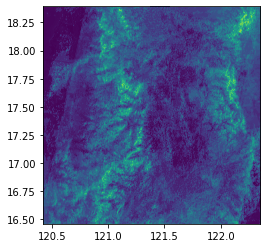

<AxesSubplot:>

In [7]:
data = rasterio.open('/data/philippines/original/2001_resampled.tif')
show(data)

## Download Matt Hansen data for target labels

In [8]:
geometry_phil_new = ee.Geometry.Polygon( 120.4206910,  18.3930054 ,
                                         120.4206910,  16.4612683 ,
                                         122.3524282,  16.4612683 ,
                                         122.3524282,  18.3930054)

phil_image_hansen = ee.Image('UMD/hansen/global_forest_change_2020_v1_8').clip(geometry_phil_new)

phil_image_hansen=phil_image_hansen.select('loss')

# Inspired by code present here https://colab.research.google.com/github/giswqs/qgis-earthengine-examples/blob/master/Folium/ee-api-folium-setup.ipynb#scrollTo=Q7uImKYn2R2z

ndvi_viz = {'min': 0, 'max': 1.0, 'palette': ['00FF00', '0000FF']}

f = folium.Figure(width=500, height=500)
map_ndvi = folium.Map(location=[16,121], zoom_start=7).add_to(f)

# Add the image layer to the map and display it.

folium.raster_layers.TileLayer(
            tiles = ee.Image(phil_image_hansen).getMapId(ndvi_viz)['tile_fetcher'].url_format,
            attr = 'GEE',
            ).add_to(map_ndvi)

display(map_ndvi)

In [9]:
# task = ee.batch.Export.image.toCloudStorage(**{
#             'image': ee.Image('UMD/hansen/global_forest_change_2020_v1_8').clip(geometry_phil_new),
#             'region': geometry_phil_new,
#             'description':'Matt_hansen_phil_new',
#             'fileNamePrefix': "phil/",
#             'scale': 30,
#             'bucket': 'data-new-phil',
#             'fileFormat': 'GeoTIFF',
#             'maxPixels': 10000000000000})
# task.start()

In [26]:
print(task.status())

{'state': 'COMPLETED', 'description': 'Matt_hansen_phil_new', 'creation_timestamp_ms': 1643864527592, 'update_timestamp_ms': 1643866412224, 'start_timestamp_ms': 1643864543528, 'task_type': 'EXPORT_IMAGE', 'destination_uris': ['https://console.developers.google.com/storage/browser/data-new-phil/phil/'], 'attempt': 1, 'id': 'IGQKUFFT2A2F6AYEIYI45IZH', 'name': 'projects/earthengine-legacy/operations/IGQKUFFT2A2F6AYEIYI45IZH'}


In [27]:
!gsutil cp gs://data-new-phil/phil/0000000000-0000000000.tif /data/philippines/matt_hansen.tif

Copying gs://data-new-phil/phil/0000000000-0000000000.tif...
- [1 files][421.0 MiB/421.0 MiB]                                                
Operation completed over 1 objects/421.0 MiB.                                    


In [ ]:
!gdalinfo /data/philippines/original/2000.tif
!gdalwarp -te 120.4206910 16.4612683 122.3524282 18.3930054 /data/philippines/matt_hansen.tif /data/philippines/matt_hansen_clipped.tif
!gdalinfo /data/philippines/matt_hansen_clipped.tif

In [ ]:
!gdalinfo /data/philippines/original/2000.tif
!gdalinfo /data/philippines/matt_hansen_clipped.tif

In [5]:
for year in range(2000, 2001):
  start_time = time.perf_counter()
  print(f"Starting with {year = }")
  src = rasterio.open('/data/philippines/original/{}.tif'.format(year))


  for band in range(1,12):
    # print("Working on band: ", band)
    curr = pd.DataFrame(src.read(band))
    curr = curr.fillna(value = 0)
    if(np.any(np.isnan(curr)) == True):
      print(f"Nan entry at {year = }, {band = }")

    with rasterio.Env():
        profile = src.profile
        with rasterio.open('/data/philippines/original/{}_fill_0.tif'.format(year), 'w', **profile) as dst:
          for band in range(1,12):
            dst.write(curr[:][:].astype(rasterio.float64), band)
    
    del curr
  
  src.close()

Starting with year = 2000


In [8]:
for year in range(2000,2001):
  src = rasterio.open('/data/philippines/original/2000_fill_0_resampled.tif')
  X = src.read()
  isnull=0
  for i in range(0, 11):
    isnull=np.isnan(X[i,:,:]).sum()
    print(f"band {i} : {isnull}")

  print(year,":",isnull,"\tShape:",X.shape)
  src.close()
  del X

band 0 : 0
band 1 : 0
band 2 : 0
band 3 : 0
band 4 : 0
band 5 : 0
band 6 : 0
band 7 : 0
band 8 : 0
band 9 : 0
band 10 : 0
2000 : 0 	Shape: (11, 643, 643)
